# Set Variables

In [1]:
# -------- outp_version
output_versions = {
    "camel":      1062,
    "cloudstack": 1072,
    "geode":      1082,
    "hbase":      1092
}


# -------- method: first
# which_method = "first"
# which_method = "second"
which_method = "third"

# Google Colab

In [2]:
dataset_file_names = {
    "camel":      "dataset_camel - v.01",
    "cloudstack": "cloudstack_bugs - v.01",
    "geode":      "geode_Bug - v.01",
    "hbase":      "dataset_hbase - v.03"
}

In [3]:
tempPre =    "E:/darsy/00/02- arshad/10- paper code/"
tempOutput = "01- Jupyter Notebook/InDirect Method/00. Output/"

In [4]:
pre_path_outputs = {}
for k, v in dataset_file_names.items():
    pre_path_outputs[k] = tempPre + tempOutput + k + "/" + v + "/" + which_method + "/"

# Libs

In [5]:
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from operator import truediv
import seaborn as sns

# Config

In [6]:
mypaths = {}

for k, v in dataset_file_names.items():
    mypaths[k] = pre_path_outputs[k] + "performance-v{}.json".format(output_versions[k])

# my_whole_datas

In [7]:
my_whole_datas = {}
for k, v in mypaths.items():
    with open(v) as filehandle:
        my_whole_datas[k] = json.load(filehandle)

In [8]:
bla = my_whole_datas["camel"]["bug_localization_accuracy"]
threshold = my_whole_datas["camel"]["knn_accuracy_threshold"]

# y_values_const_

In [9]:
def y_th_():
    return {th_0: [] for th_0 in threshold}
    
    
def y_bla_():
    return {bla_0: [] for bla_0 in bla}

In [10]:
y_values_const_th = {}
y_values_const_bla = {}
for software_name, mwd in my_whole_datas.items():
    y_values_const_th[software_name] = {
        "simple": y_th_(),
        "bc_2":   y_th_(),
    }
    
    y_values_const_bla[software_name] = {
        "simple": y_bla_(),
        "bc_2":   y_bla_(),
    }
    
    for bla_0 in bla:
        for th_0 in threshold:
            # --- y_values_const_th
            for key, value in y_values_const_th[software_name].items():
                value[th_0].append(mwd["accuracies"][str(bla_0)][str(th_0)][key])

            # --- y_values_const_bla
            for key, value in y_values_const_bla[software_name].items():
                value[bla_0].append(mwd["accuracies"][str(bla_0)][str(th_0)][key])

# plot settings

In [11]:
ls = "solid"
lw = 1
marker = "."
colours = {
    "camel":      "red",
    "cloudstack": "blue",
    "geode":      "green",
    "hbase":      "orange"
}

# plot_acc_const_th

In [21]:
for th in threshold:
    print("-" * 10, th)
    for key, value in y_values_const_th.items():
        temp = [round(val, 1) for val in value["bc_2"][th]]
        print(key, temp)

---------- 0.5
camel [53.9, 54.9, 55.4, 56.0, 56.1]
cloudstack [72.1, 72.8, 71.1, 71.2, 71.4]
geode [73.3, 74.7, 74.2, 75.4, 74.8]
hbase [61.5, 60.1, 61.6, 61.8, 61.9]
---------- 0.55
camel [54.3, 55.2, 55.9, 56.3, 56.5]
cloudstack [72.2, 73.1, 71.3, 71.6, 71.8]
geode [73.2, 74.7, 74.1, 75.3, 74.6]
hbase [61.8, 59.9, 61.3, 61.8, 61.5]
---------- 0.6
camel [54.3, 55.6, 56.8, 57.8, 58.0]
cloudstack [72.4, 73.4, 72.0, 72.0, 72.4]
geode [73.1, 75.0, 74.4, 75.4, 74.7]
hbase [61.3, 59.5, 61.5, 61.8, 61.4]
---------- 0.65
camel [54.2, 55.5, 55.7, 57.1, 57.7]
cloudstack [72.8, 74.3, 72.8, 72.9, 73.3]
geode [73.1, 75.1, 74.3, 75.6, 74.9]
hbase [60.8, 59.5, 61.0, 61.7, 61.1]
---------- 0.7
camel [54.4, 56.3, 56.1, 57.6, 58.9]
cloudstack [73.5, 74.8, 73.4, 73.9, 74.5]
geode [72.7, 75.1, 74.2, 75.2, 74.7]
hbase [60.0, 59.6, 61.5, 62.6, 61.8]
---------- 0.75
camel [56.5, 58.8, 57.2, 59.7, 61.0]
cloudstack [73.7, 75.3, 73.9, 74.4, 75.3]
geode [72.3, 75.2, 74.1, 75.1, 75.0]
hbase [59.3, 58.5, 60.7, 6

In [18]:
def set_title_const_th_(th_gname):
    tempstr = "-" * 5
    my_title = tempstr + " KNN Accuracy Threshold: " + str(th_gname) + " " + tempstr
    return my_title

In [19]:
# --------------------------- plot_acc_const_th | linear plot
    
def plot_acc_const_th():
    nplot = len(threshold)
    my_fig_height = 18
    temp1 = my_fig_height / 5
    temp2 = temp1 * nplot
    # figsize=(a, b) : a_width, b_height
    fig, axes = plt.subplots(nrows=nplot, ncols=1, figsize=(9, temp2))
    if nplot == 1:
        axes = [axes]

    for ax, th in zip(axes, threshold):
        for key, value in y_values_const_th.items():
            ax.plot(bla, 
                    value["bc_2"][th], 
                    label=key, 
                    color=colours[key], 
                    linestyle=ls, 
                    lw=lw, 
                    marker=marker)

        ax.set_title(set_title_const_th_(th))
        ax.set_xlabel("Bug Localization Accuracy")
        ax.set_ylabel("Total accuracy")

        ax.set_xlim([0.3, 1.05])
        ax.get_xaxis().set_ticks(bla)

        ax.set_ylim([0, 110])
        ax.get_yaxis().set_ticks(list(range(0, 101, 10)))

        ax.legend()
        ax.grid(True)
    # --- end for

    fig.tight_layout(pad=2.0)
    
    
    my_path =   "D:/SAVE/Tests/"
    file_name = "Indirect Method - const th - v01-dpi=2000.jpg"
    full_path = my_path + file_name

    resolution_value = 1000

    fig.savefig(full_path, format="jpg", dpi=resolution_value)



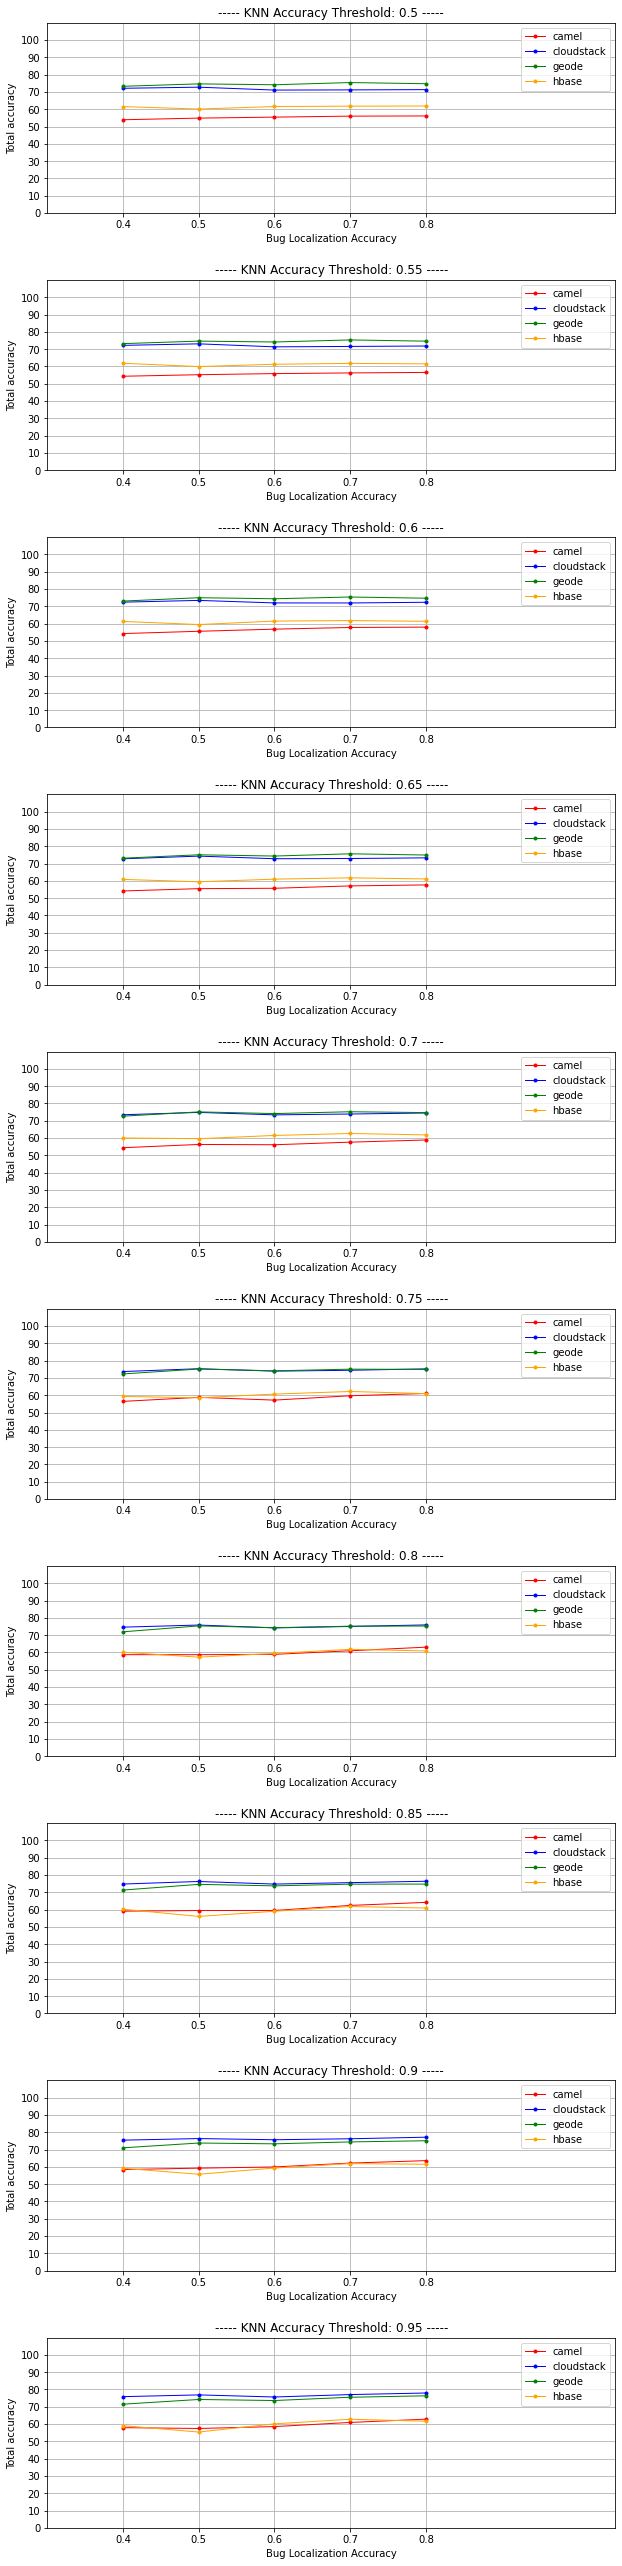

In [20]:
plot_acc_const_th()

# plot_acc_const_bla

In [24]:
def set_title_const_bla_(bla_name):
    tempstr = "-" * 5
    my_title = tempstr + " Bug Localization Accuracy: " + str(bla_name) + " " + tempstr
    return my_title

In [25]:
# --------------------------- plot_acc_const_bla | linear plot
    
def plot_acc_const_bla():
    my_nplot = len(bla)
    my_fig_height = 18
    temp1 = my_fig_height / 5
    temp2 = temp1 * my_nplot
    # figsize=(a, b) : a_width, b_height
    fig, axes = plt.subplots(nrows=my_nplot, ncols=1, figsize=(9, temp2))
    if my_nplot == 1:
        axes = [axes]

    for ax, bla_0 in zip(axes, bla):
        for key, value in y_values_const_bla.items():
            ax.plot(threshold, 
                    value["bc_2"][bla_0], 
                    label=key, 
                    color=colours[key], 
                    linestyle=ls, 
                    lw=lw, 
                    marker=marker)

        ax.set_title(set_title_const_bla_(bla_0))
        ax.set_xlabel("KNN Accuracy Threshold")
        ax.set_ylabel("Total accuracy")

        ax.set_xlim([0.3, 1.05])
        ax.get_xaxis().set_ticks(threshold)

        ax.set_ylim([0, 110])
        ax.get_yaxis().set_ticks(list(range(0, 101, 10)))

        ax.legend()
        ax.grid(True)
    # --- end for

    fig.tight_layout(pad=2.0)
    
    my_path =   "D:/SAVE/Tests/"
    file_name = "Indirect Method - const bla - v01-dpi=2000.jpg"
    full_path = my_path + file_name

    resolution_value = 1000

    fig.savefig(full_path, format="jpg", dpi=resolution_value)

In [23]:
for bla_0 in bla:
    print("-" * 10, bla_0)
    for key, value in y_values_const_bla.items():
        temp = [round(val, 1) for val in value["bc_2"][bla_0]]
        print(key, temp)

---------- 0.4
camel [53.9, 54.3, 54.3, 54.2, 54.4, 56.5, 58.7, 59.1, 58.4, 57.9]
cloudstack [72.1, 72.2, 72.4, 72.8, 73.5, 73.7, 74.6, 74.8, 75.4, 75.8]
geode [73.3, 73.2, 73.1, 73.1, 72.7, 72.3, 71.9, 71.3, 71.0, 71.5]
hbase [61.5, 61.8, 61.3, 60.8, 60.0, 59.3, 60.1, 60.3, 59.2, 59.0]
---------- 0.5
camel [54.9, 55.2, 55.6, 55.5, 56.3, 58.8, 58.7, 59.5, 59.2, 57.4]
cloudstack [72.8, 73.1, 73.4, 74.3, 74.8, 75.3, 75.9, 76.3, 76.4, 76.9]
geode [74.7, 74.7, 75.0, 75.1, 75.1, 75.2, 75.4, 74.6, 73.8, 74.2]
hbase [60.1, 59.9, 59.5, 59.5, 59.6, 58.5, 57.3, 56.1, 55.7, 55.4]
---------- 0.6
camel [55.4, 55.9, 56.8, 55.7, 56.1, 57.2, 58.9, 59.5, 59.9, 58.5]
cloudstack [71.1, 71.3, 72.0, 72.8, 73.4, 73.9, 74.2, 74.8, 75.7, 75.7]
geode [74.2, 74.1, 74.4, 74.3, 74.2, 74.1, 74.3, 73.8, 73.3, 73.6]
hbase [61.6, 61.3, 61.5, 61.0, 61.5, 60.7, 59.4, 59.1, 59.3, 60.1]
---------- 0.7
camel [56.0, 56.3, 57.8, 57.1, 57.6, 59.7, 61.0, 62.5, 62.2, 60.9]
cloudstack [71.2, 71.6, 72.0, 72.9, 73.9, 74.4, 75.0, 

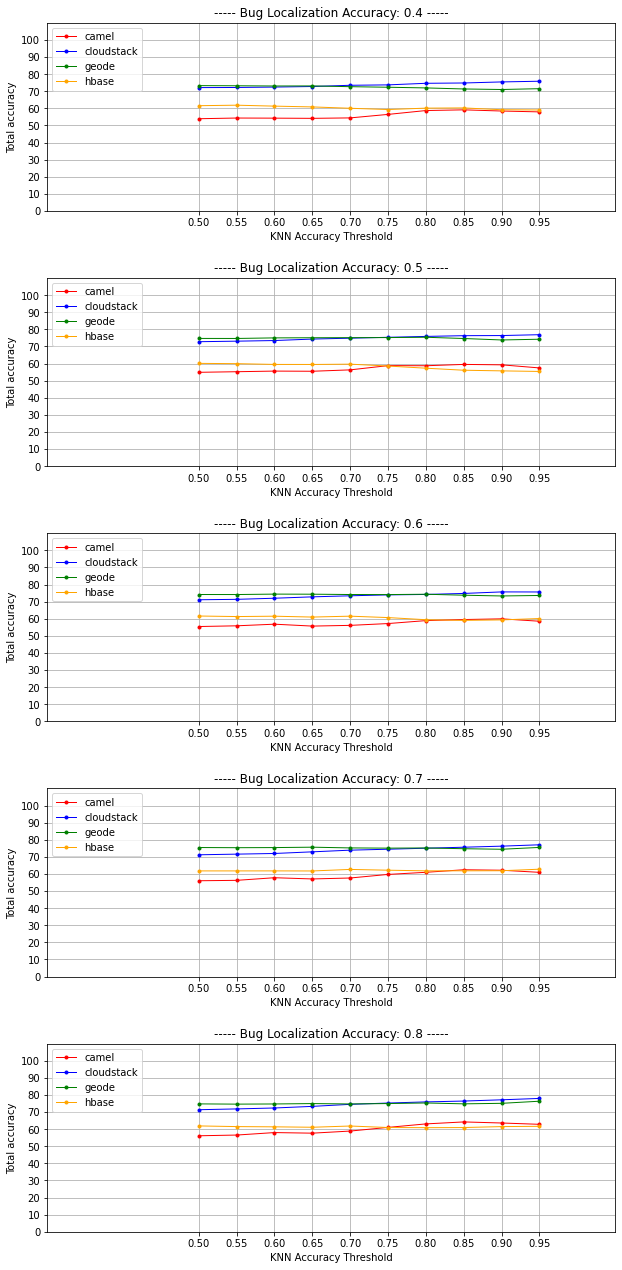

In [26]:
plot_acc_const_bla()

# bar

In [ ]:
pridictable_bug_report_percentages = {
    "camel":      4.3,
    "cloudstack": 38.1,
    "geode":      20.8,
    "hbase":      6.9
}

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))

x_axis = np.arange(len(pridictable_bug_report_percentages))
width = 0.7

ax.bar(
    x_axis, 
    pridictable_bug_report_percentages.values(), 
    width=width, 
    label="Bug Report", 
    color="#1F77B4" # blue
)

ax.set_title("Pridictable Bug Report Percentages")
ax.set_xlabel("Product Name")
ax.set_ylabel("Percentage of bug reports (%)")

ax.get_xaxis().set_ticks(x_axis, pridictable_bug_report_percentages.keys())

ax.set_ylim([0, 110])
ax.get_yaxis().set_ticks(list(range(0, 101, 10)))

ax.legend()
ax.grid(axis="y")
fig.tight_layout(pad=1.0)

In [ ]:
my_path =   "D:/SAVE/Tests/"
file_name = "Indirect Method - pridictable brp - v01-dpi=2000.jpg"
full_path = my_path + file_name

resolution_value = 2000

fig.savefig(full_path, format="jpg", dpi=resolution_value)